## __Worked Example 6.4 Graphics: Drawing Regular Polygons__ (Chapter 6)

### HERE 20210505

---

In [1]:
# DO NOT DELETE THIS. MAY BE REQUIRED FOR DISPLAYING IMAGES AND/OR VIDEOS.
#
from IPython.display import display, Image, SVG, Math, YouTubeVideo

----

<span style="color: #44f; font-size: 1.2em;">__Problem Statement__:</span> &nbsp; Design and implement a Python function that draws a _regular polygon_ with a given number of sides centered at a given point.

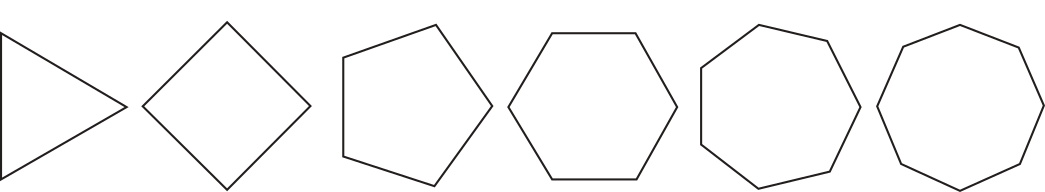

In [2]:
Image( 'figures/png/pfe3-regular-polygon.png', width=500 )

A _regular polygon_ is a shape with at least three sides, where each side is of equal length. 

Each corner of a polygon is called a _vertex_, which is a 2d point with an x- and a y-coordinate. So, a triangle, for example, has three vertices, and a hexagon has six. 

For a hexagon, each vertex is $\Delta=\dfrac{360}{6}$ degrees away from each other with respect to the center point of that hexagon. Therefore, $\Delta{=}60$ degrees.

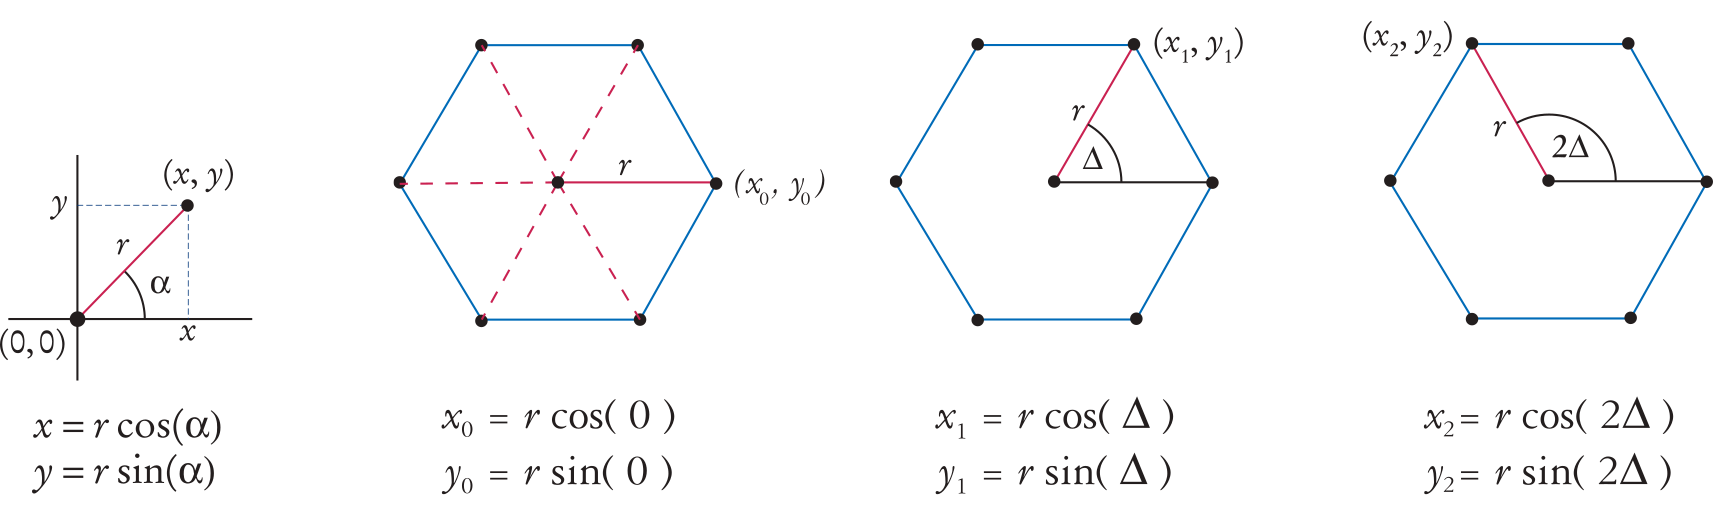

In [3]:
Image( 'figures/png/pfe3-hexagon-angles.png', width=600 )

__Algorithm__ to draw a _hexagon_:

- Generate six vertices by successively _rotating_ each vertex by $\Delta$ degrees with respect to the center of that hexagon, where $\Delta = \frac{360}{6}$
- Take each successive pair of vertices and draw a straight line between those vertices. 
- Finally, join the last vertex with the first with a straight line.

In general, angle $\Delta$ is determined by computing $\dfrac{360}{n}$ where $n$ is the number of sides for a given regular polygon.

So, here is how we have to draw the lines using the vertices for a hexagon:

All this is nice, but we have a bit of a challenge. Which parameter do we want to use in order to specify the size of the regular polygon we wish to draw. Do we wish to use the _radius_, $r$, or the length of each side, $d$?

When it comes to drawing regular polygons, radius may be the right choice in some cases, and, at other times, we may wish to use the length of each side. Obviously, there is no need to specify both, because one can be derived from the other. But how? This computation is our current challenge.

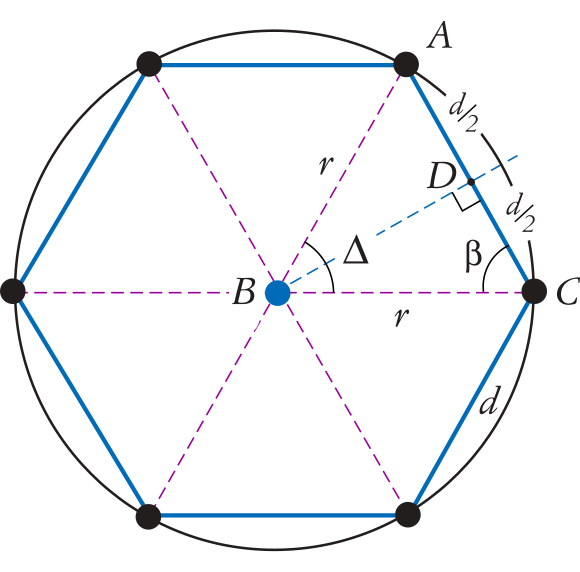

In [4]:
Image( 'figures/png/pfe3-regular-hexagon.png', width=350 )

Even though we are using a hexagon to _generalize_ how we do this for any $n$-sided regular polygon, the general formula we will obtain will work in all cases.

You can try this exercise with the triangle or pentagon case. The relationships in the above figure will be valid for those shapes as well.

Consider the triangle ABC. There is a bisecting blue dashed line that joins point B, the center of the shape, to line segment AC at a perpendicular angle. This means the angle $\angle$DBC is $\Delta/2$. Therefore, $\beta = 180 - \left(90 + \dfrac{\Delta}{2}\right) = \left(90 - \dfrac{\Delta}{2}\right)$.

Using basic geometry, we know that $\dfrac{d}{2} = r \cos( \beta )$. Therefore, rearranging this formula we get:

$$
r = \dfrac{d}{2\times \cos( \beta )}
$$



So, now, the relationship between $d$ and $r$ is established. 

If we wish to specify $d$, then we can compute $r$ using this formula. If we wish to specify $r$ directly, then we do not even need to compute $d$, unless we wish to know what its value is. However, to draw the regular polygon, we do not need to know what $d$ is, since we draw using $r$.

Rearranging the above formula for computing $r$, we can get $d$ in terms of $r$:

$$
d = 2 r \times \cos( \beta )
$$

---

Since we will be using `ezgraphics`, the functions we will write will have to accept a reference to a _canvas_ object.

---

Let us consider a function that, given a list of vertex coordinates, connects these vertices with straight lines.

We can leave it up to the calling context to decide whether the shape should be closed by joining last vertex with the first. So, the `closed` parameter to `draw_polyline()` will be set to the _default_ value of `True` so that the `draw_polyline()` will always complete this last step. 

If we wish not to close the shape, we will have to explicitly set `closed` to `False`.

The more we think, the more flexibility we can add, but, of course, up to a point.

Note that _keyword_ arguments with default values 

In [5]:
def draw_polyline( vertices: list, canvas, closed=True ):
    """
    Given a canvas object, this function connects each successive 
    pair of points/vertices with a straight line. The closed argument
    controls whether the last vertex in vertices should be connected
    back to the first vertex. The default behavior is to close the
    shape. Each vertex is specified as a 2-tuple as (x, y).
    
    Example:
    >>> vertices = [(0, 0), (200, 0), (200, 200), (0, 200)]
    >>> draw_polyline( vertices, canvas )
    
    ***********************
    *** REFACTORED CODE ***
    ***********************
    """
    last = len( vertices ) - 1  # Index of the last vertex

    for i in range( last ):
        #
        # Take a successive pair of points by starting from the 
        # vertex at i and pick the next at (i + 1). Note that  
        # counting with i will stop not at the last vertex but 
        # the one right before it.
        #
        start_x, start_y = vertices[i] # Using tuple assignment
        end_x, end_y = vertices[i + 1] # Using tuple assignment
        
        canvas.drawLine( start_x, start_y, end_x, end_y )
    
    if closed:
        #
        # Join the last vertex to the first to close the shape.
        #
        start_x, start_y = vertices[-1] # Take the last vertex
        end_x, end_y = vertices[0] # And join back with the first
        
        canvas.drawLine( start_x, start_y, end_x, end_y ) 

A quick test ...

In [38]:
from ezgraphics import GraphicsWindow

win = GraphicsWindow( 1000, 800 )
canvas = win.canvas()

In [39]:
vertices = [(0, 0), (200, 0), (200, 200), (0, 200)]

In [40]:
draw_polyline( vertices, canvas )

In [41]:
vertices = [(500, 500), (510, 470), (480, 400), (450, 500)]

In [42]:
draw_polyline( vertices, canvas, closed=False )

In [43]:
draw_polyline( vertices, canvas, closed=True )

In [44]:
win.wait() # *** CLOSE THE WINDOW TO BE ABLE TO CONTINUE WITH CODE BELOW ***

---

In [45]:
import math

def degrees_to_radians( degrees ):
    """
    Returns the radian equivalent of the provideded angle in degrees
    """
    return degrees * math.pi / 180

In [46]:
degrees_to_radians( 180 )

3.141592653589793

In [47]:
degrees_to_radians( 90 )

1.5707963267948966

In [48]:
degrees_to_radians( 360 ) # 2 pi

6.283185307179586

In [49]:
2 * math.pi

6.283185307179586

---

To draw a regular polygon, our function will have to accept how many sides to be drawn with the `n` parameter. 

Then the `dimension` parameter will represent either the _radius_ or the _length of a side_ depending on the value of `mode`. If the `mode` parameter is set to `side` (default), then `dimension` will be the length of each side of the regular polygon. If `mode` is `radius`, then `dimension` will be taken as the _radius_ value.

---

In [50]:
def draw_regular_polygon( n, dimension, center, canvas, mode="side", start_angle=0 ):
    """
    Draws a polygon with n sides where each side of the provided dimension
    """
    assert mode in ["side", "radius"], f"Unexpected mode: {mode}"
    assert n >= 3, "You must specify at least 3 sides (n)"
    
    cx, cy = center # Tuple assignment
    delta = 360.0 / n # Angle increment
    beta = 90 - delta / 2 # See the figure above
    cur_angle = start_angle # Starting angle will always be zero
    vertices = [] # list to store the vertices we will be computing

    if mode == "side":
        # 
        # The given dimension is the length of a side of the polygon. So
        # we have to compute the radius, r.
        #
        r = dimension / (2 * math.cos( degrees_to_radians( beta ) ))
    else: # mode <-- radius
        r = dimension
    
    for i in range( n ):
        #
        # We will create as many vertices as we have sides.
        #
        cur_vertex_x = cx + r * math.cos( degrees_to_radians( cur_angle ) )
        cur_vertex_y = cy + r * math.sin( degrees_to_radians( cur_angle ) )
        
        vertices.append( (cur_vertex_x, cur_vertex_y) ) # Append a (x, y) coord.
        
        cur_angle += delta

    # Now that we have generated a list of vertices, we can connect this list of
    # vertices with straight lines.
    #
    draw_polyline( vertices, canvas )
    return r

---

> Let's demonstrate how we can add a `start_angle` parameter for more customization.

---

In [51]:
from ezgraphics import GraphicsWindow

win = GraphicsWindow( 1000, 800 )
canvas = win.canvas()

In [52]:
draw_regular_polygon( 50, 100, (100, 100), canvas, mode="radius" )

100

In [53]:
draw_regular_polygon( 20, 100, (100, 100), canvas, mode="radius" )

100

In [54]:
draw_regular_polygon( 10, 100, (100, 100), canvas, mode="radius" )

100

In [55]:
draw_regular_polygon( 3, 100, (100, 100), canvas, mode="radius" )

100

In [56]:
draw_regular_polygon( 4, 100, (100, 100), canvas, mode="radius" )

100

In [57]:
draw_regular_polygon( 5, 100, (100, 100), canvas, mode="radius" )

100

In [58]:
draw_regular_polygon( 6, 100, (100, 100), canvas, mode="radius" )

100

---

In [59]:
draw_regular_polygon( 4, 100, (500, 500), canvas )

70.71067811865474

In [60]:
draw_regular_polygon( 4, 100, (500, 500), canvas, start_angle=45 )

70.71067811865474

In [61]:
draw_regular_polygon( 3, 100, (100, 100), canvas )

57.735026918962575

In [62]:
canvas.drawOval( 500, 500, 100, 100 )

110

In [63]:
100 / (2 * math.cos( degrees_to_radians( 30 ) ))

57.735026918962575

In [64]:
draw_regular_polygon( 50, 57.735026918962575, (100, 100), canvas, mode="radius" )

57.735026918962575

---

In [65]:
draw_regular_polygon( 5, 200, (500, 500), canvas )

170.13016167040797

In [66]:
draw_regular_polygon( 6, 200, (200, 200), canvas )

199.99999999999994

In [67]:
draw_regular_polygon( 3, 150, (200, 500), canvas )

86.60254037844386

In [68]:
draw_regular_polygon( 50, 20, (200, 500), canvas )

159.25971109908616

In [69]:
draw_regular_polygon( 100, 20, (200, 500), canvas )

318.3622520909752

In [70]:
win.wait()

---